<a href="https://colab.research.google.com/github/simecek/dspracticum2020/blob/master/lecture_02/03_dense_neural_network_and_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


## Data

In [2]:
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
raw_dataset = pd.read_csv(url)
raw_dataset.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [3]:
features = ['Pclass', 'Sex', 'Age', 'Fare']
label = 'Survived'

dataset = raw_dataset.copy()[[label] + features]
# convert Sex from string to 0/1
dataset['Sex'] = pd.factorize(dataset['Sex'])[0]

dataset.tail()

,Survived,Pclass,Sex,Age,Fare
882,0,2,0,27.0,13.00
883,1,1,1,19.0,30.00
884,0,3,1,7.0,23.45
885,1,1,0,26.0,30.00
886,0,3,0,32.0,7.75


In [4]:
# split the dataset into two parts (train & test)
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.shape, test_dataset.shape

((710, 5), (177, 5))

In [5]:
# separate label column from the data
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(label)
test_labels = test_features.pop(label)

train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((710, 4), (177, 4), (710,), (177,))

## Predict Survival from Pclass, Sex, Age and Fare

In [6]:
# normalizer
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [7]:
# model definition
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(100, activation='relu'),
      layers.Dense(1)
])

dnn_model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=['accuracy'])

In [8]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 610
Trainable params: 601
Non-trainable params: 9
_________________________________________________________________


In [9]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 4.68 s, sys: 350 ms, total: 5.03 s
Wall time: 4.35 s


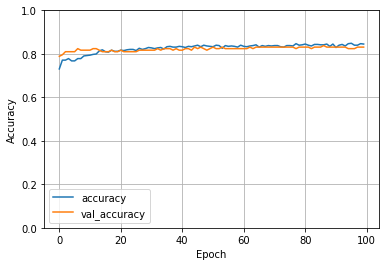

In [10]:
def plot_loss(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [11]:
# evaluation on test data
test_evaluation = {}
test_evaluation['dnn_model'] = dnn_model.evaluate(
    test_features,
    test_labels, verbose=0)
test_evaluation

{'dnn_model': [0.4976102411746979, 0.8079096078872681]}